<IPython.core.display.Javascript object>


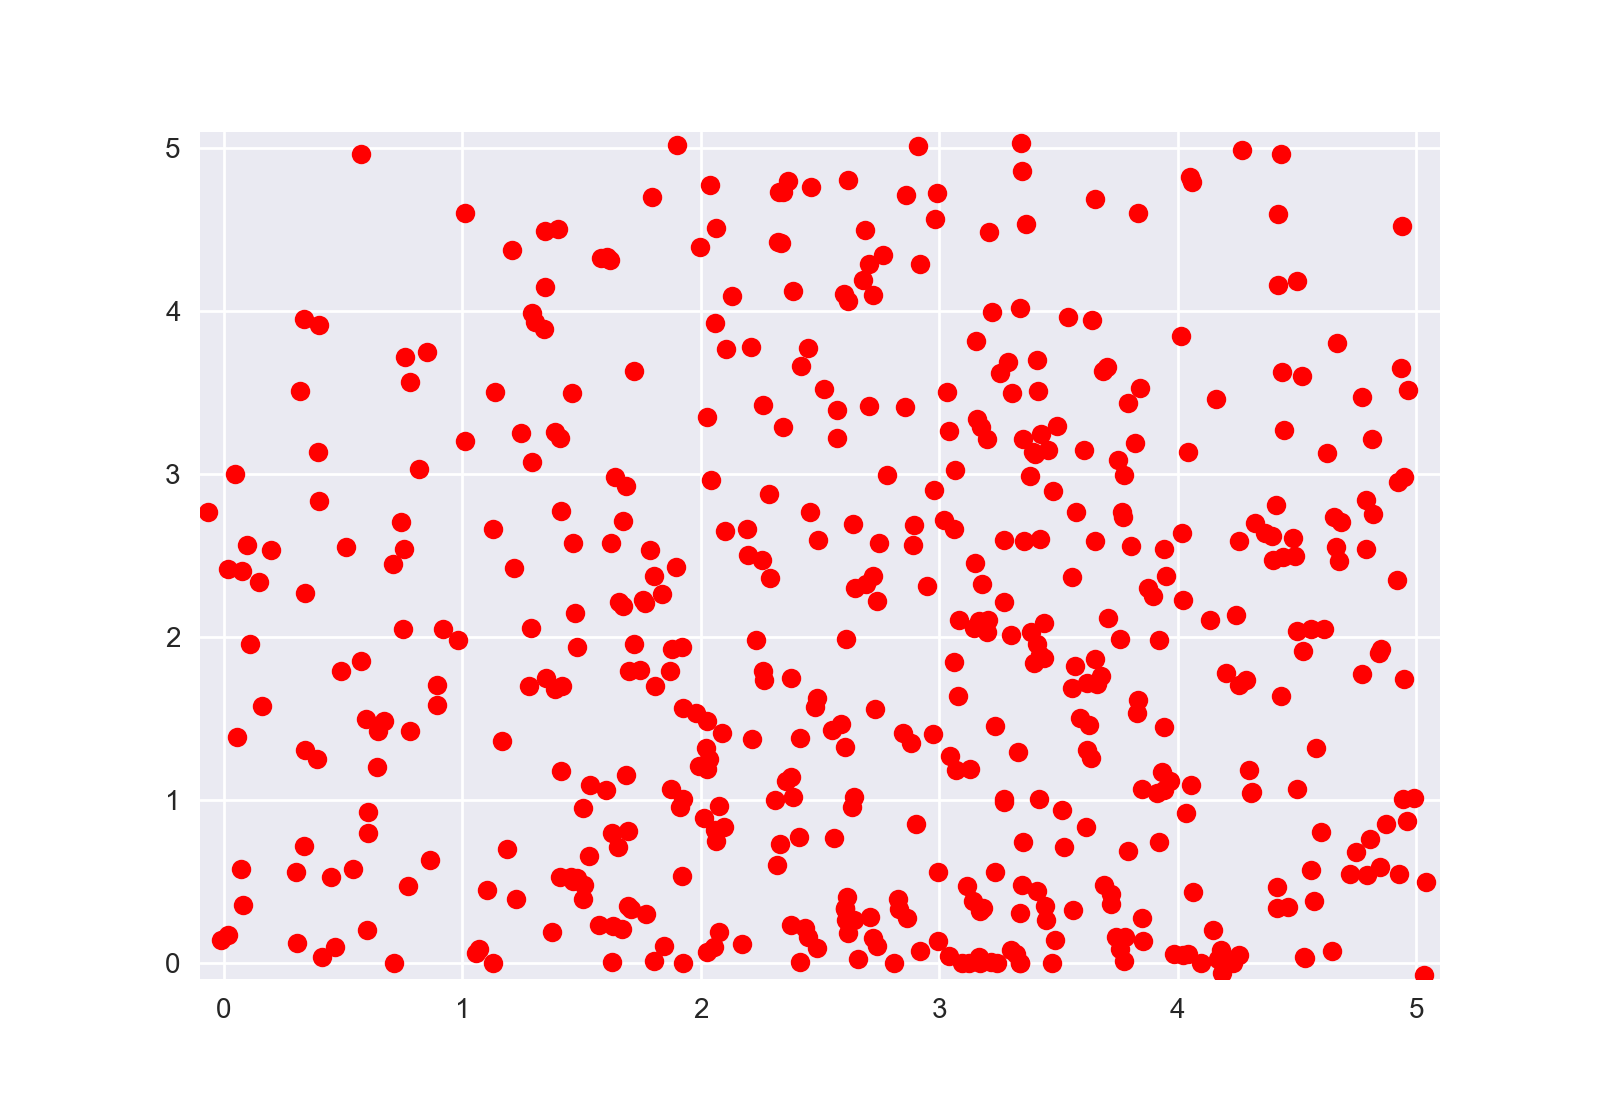

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
import time

g = -50

m = 5e-23

nop = 500 # Number of Particles to be simulated

nopreal = 1e25  # Number of particles represented

w = nopreal/nop

d = 3.7e-10   # Diameter of particles

sigma = d

m_data = np.array([m]*nop)  # Mass of particles

rtemp = 295 #Room temp

wtemp = 295 # Wall Temp

kb =   1.3806485e-23   # Boltzman Constant

wallx = 5

wally = 5

nocx = 50   # No of cells in x

nocy = 50   # No of cells in y

celldx = wallx/nocx          # Cell Dimen x

celldy = wally/nocy         # Cell Dimen y

cell_ar = celldx*celldy # Area of cell

noct = int(nocx*nocy) # Total number of cells

x_his = [] # history of x-data

y_his = [] # history of y-data

x_data = (wallx/2)+(0.001+np.random.uniform(size = nop))*wallx/10
y_data = (wallx/2)+(0.001+np.random.uniform(size = nop))*wally/10

x_his.append(x_data)
y_his.append(y_data)

vx_data = np.sqrt(-2*(kb/m_data)*rtemp*np.log(np.random.uniform(size = nop)))*np.cos(2*np.pi*np.random.uniform(size = nop))
vy_data = np.sqrt(-2*(kb/m_data)*rtemp*np.log(np.random.uniform(size = nop)))*np.sin(2*np.pi*np.random.uniform(size = nop))

cell_data = np.array([0]*nop)

# sns.distplot(vx_data, label="X_V")

# sns.distplot(vy_data, label="y_v")

# plt.legend()

# plt.show()

# plt.gcf().clear()

# plt.plot(x_data,y_data ,"ro")

# plt.show()

# plt.gcf().clear()

#range  
tstart = 0.
tstop = 1/2

# set up steps 
n = 100

dt = (tstop-tstart)/n
# set up the array of time
t= np.linspace(tstart, tstop, n) 


def velocityx():
    
    return 0

def velocityy():
    
    return g

def posx(vx):
    
    return vx

def posy(vy):
    
    return vy

def solvstep(f, x, args,n):
    
    return x + ((dt/n)*f(**args))


for m in range(0,n):
    
    for h in range(0,3):
        x_data = solvstep(posx, x_data, {"vx":vx_data},3)
    
        y_data = solvstep(posy, y_data, {"vy":vy_data},3)
    
        vx_data = solvstep(velocityx, vx_data, {},3)
    
        vy_data = solvstep(velocityy, vy_data, {},3)
    
    
    for j in range(0,nop):
        
        xcellno =  int(x_data[j] / celldx)  # Cell # of the particle in x-axis
        
        ycellno = int(y_data[j]/ celldy)    # Cell # of the particle in y-axis
        
        if (ycellno < 0):
            
            ycellno = 0
            
        if (xcellno < 0):
            
            xcellno = 0
            
            
        cellno = ((ycellno)*nocx)+xcellno
        
        cell_data[j] = cellno
        
        
    
    for j in range(0,noct):
        
        parincell = []
        
        for f in range(0, nop):
            
            if(cell_data[f] == j):
                
#                 print(j)
                parincell.append(f)     # Making array of particle numbers in the given cell
                
        
        parincell = np.array(parincell)
        for i in range(0, parincell.size):
            
            for k in range(i+1, parincell.size):
                
                if(True ):
                    a = parincell[i]
                    b = parincell[k]
                    gx = vx_data[b] - vx_data[a]
                    gy = vy_data[b] - vy_data[a]
                
                    vel = np.sqrt((gx**2)+(gy**2))
                
#                     if(gx > 0 and gy > 0):
                    
#                         prob = 0
                    
#                     else:
                    
#                         prob = dt*vel*sigma*w/cell_ar
                    
                    prob = dt*vel*sigma*w/cell_ar
        
                    alpha = np.random.uniform()
                
                    if(alpha < prob):
                    
                        alpha1 = np.random.uniform()
                    
                        diff = ((vx_data[a]-vx_data[b])*(np.cos(2*np.pi*alpha1)))+((vy_data[a]-vy_data[b])*(np.sin(2*np.pi*alpha1)))
                    
                        vx_data[b] = vx_data[b] + ((diff)*np.cos(2*np.pi*alpha1))
                    
                        vx_data[a] = vx_data[a] - ((diff)*np.cos(2*np.pi*alpha1))
                    
                        vy_data[b] = vy_data[b] + ((diff)*np.sin(2*np.pi*alpha1))
                    
                        vy_data[a] = vy_data[a] - ((diff)*np.sin(2*np.pi*alpha1))
                
                
                
#                     else:
                    
#                         continue
       
    
    
    for i in range(0,nop):
        
        if((y_data[i] <= 0 and vy_data[i] < 0 ) or (y_data[i] >= wally and vy_data[i] > 0)):
            
            alpha_1 = np.random.uniform()
            alpha_2 = np.random.uniform()
            alpha_3 = np.random.uniform()

            vx_data[i] = np.sqrt(-2*(kb/m_data[i])*wtemp*np.log(alpha_1))*np.cos(2*np.pi*alpha_2)
            vy_data[i] = np.sqrt(-2*(kb/m_data[i])*wtemp*np.log(alpha_3))
            
    
#             vy_data[i] = -vy_data[i]
    
            
            if (y_data[i] >= wally):
                
#                 y_data[i] = wally
                vy_data[i] = -vy_data[i]
                
            if(y_data[i] <=0 ):
                y_data[i] = 0
# #                 vy_data[i] = -vy_data[i]
            
        if((x_data[i] <= 0 and vx_data[i] < 0 ) or (x_data[i] >= wallx and vx_data[i] > 0)):
            
            alpha_1 = np.random.uniform()
            alpha_2 = np.random.uniform()
            alpha_3 = np.random.uniform()
        
#             vx_data[i] = np.sqrt(-2*(kb/m_data[i])*wtemp*np.log(alpha_1))
#             vy_data[i] = np.sqrt(-2*(kb/m_data[i])*wtemp*np.log(alpha_2))*np.cos(2*np.pi*alpha_3)
            
            vx_data[i] = -vx_data[i]
            
#             if (x_data[i] <=0):
                
#                 x_data[i] = 0
                
#             else:
#                 x_data[i] = wallx
# #                 vx_data[i] = -vx_data[i]
     
    

    
    x_his.append(x_data)
    
    y_his.append(y_data)

    
    
    
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

ax1.set_xlim(-celldx, wallx+celldx)
ax1.set_ylim(-celldy, wally+celldy)

ims = []

for i in range(0, n):
    
    ims.append(ax1.plot(x_his[i], y_his[i],"ro"))

im_ani = animation.ArtistAnimation(fig, ims, interval=n, repeat_delay=500,
                                   blit=True)

# from matplotlib import rc

    
# im_ani.save('im.mp4')
# HTML(im_ani.to_html5_video())

# ax1.plot(x_his[-1], y_his[-1],"ro")

# print(y_his[-1], x_his[-1])

plt.show()

# plt.gcf().clear()


    



In [ ]:
# plt.plot(x_his[-1],y_his[-1] ,"ro")

# plt.show()

# plt.gcf().clear()

